In [1]:
!ls ../experiments/logs

arch_evals	 arch_sweep_standard  lr_sweep	      new_lr_sweep
arch_sweep	 arch_sweep_unambig   lr_sweep_gpt2   new_lr_sweep_gpt2
arch_sweep_easy  difficulty	      lr_sweep_llama  new_lr_sweep_llama
arch_sweep_new	 hyena_start	      misc	      new_lr_sweep_nodrop


In [2]:
import glob
import os
import pandas as pd
import plotnine as p9
from tqdm import tqdm

In [19]:
dirs = [
    # "../experiments/logs/arch_sweep_easy/**/test/SummaryEvaluator.csv",
    "../experiments/logs/arch_sweep_easy/**/test/InterchangeEvaluator.csv",
    # "../experiments/logs/arch_sweep_standard/**/test/SummaryEvaluator.csv",
    "../experiments/logs/arch_sweep_standard/**/test/InterchangeEvaluator.csv",
]

In [20]:
all_files = []
for d in dirs:
    all_files.extend(list(glob.glob(d)))
dfs = []
for file in tqdm(all_files):
    evaluator = file.split("/")[-1].split(".")[0]
    splitted = os.path.dirname(file).split("/")[-2].split(".")[0].split("_")
    log = pd.read_csv(file)
    log["identifier"] = file
    log["arch"] = "_".join(splitted[:-2])
    log["dim"] = int(splitted[-2])
    log["lr"] = float(splitted[-1])
    log["evaluator"] = evaluator
    log["step_rel"] = log["step"] / log["step"].max()
    log["layers"] = 2
    log = log.groupby(["variable", "step", "evaluator", "step_rel", "identifier", "arch", "dim", "lr", "layers"]).mean().reset_index()
    dfs.append(log)
print(len(dfs))
df = pd.concat(dfs)
df = df.groupby(["variable", "step", "evaluator", "step_rel", "identifier", "arch", "dim", "lr", "layers"]).mean().reset_index()
df

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 379/379 [01:58<00:00,  3.20it/s]


379


variable   step  \
0         0.PARENT.query_item_orig.divider.attention_inp...      0   
1         0.PARENT.query_item_orig.divider.attention_inp...      0   
2         0.PARENT.query_item_orig.divider.attention_inp...      0   
3         0.PARENT.query_item_orig.divider.attention_inp...      0   
4         0.PARENT.query_item_orig.divider.attention_inp...      0   
...                                                     ...    ...   
21921427  original.PARENT.target_item_orig.target_item_o...  50000   
21921428  original.PARENT.target_item_orig.target_item_o...  50000   
21921429  original.PARENT.target_item_orig.target_item_o...  50000   
21921430  original.PARENT.target_item_orig.target_item_o...  50000   
21921431  original.PARENT.target_item_orig.target_item_o...  50000   

                     evaluator  step_rel  \
0         InterchangeEvaluator       0.0   
1         InterchangeEvaluator       0.0   
2         InterchangeEvaluator       0.0   
3         InterchangeEvaluator       0.0   
4         InterchangeEvaluator       0.0   
...                        ...       ...   
21921427  InterchangeEvaluator       1.0   
21921428  InterchangeEvaluator       1.0   
21921429  InterchangeEvaluator       1.0   
21921430  InterchangeEvaluator       1.0   
21921431  InterchangeEvaluator       1.0   

                                                 identifier       arch  dim  \
0         ../experiments/logs/arch_sweep_easy/attention_...  attention  128   
1         ../experiments/logs/arch_sweep_easy/attention_...  attention  128   
2         ../experiments/logs/arch_sweep_easy/attention_...  attention  128   
3         ../experiments/logs/arch_sweep_easy/attention_...  attention  128   
4         ../experiments/logs/arch_sweep_easy/attention_...  attention  128   
...                                                     ...        ...  ...   
21921427  ../experiments/logs/arch_sweep_standard/hyena_...      hyena   64   
21921428  ../experiments/logs/arch_sweep_standard/hyena_...      hyena   64   
21921429  ../experiments/logs/arch_sweep_standard/hyena_...      hyena   64   
21921430  ../experiments/logs/arch_sweep_standard/hyena_...      hyena   64   
21921431  ../experiments/logs/arch_sweep_standard/hyena_...      hyena   64   

               lr  layers     value  
0         0.01000       2  0.000000  
1         0.00100       2  0.000000  
2         0.00010       2  0.000000  
3         0.00001       2  0.000000  
4         0.00300       2  0.000000  
...           ...     ...       ...  
21921427  0.00010       2  0.522580  
21921428  0.00001       2  0.276159  
21921429  0.00300       2  0.477483  
21921430  0.00030       2  0.549109  
21921431  0.00003       2  0.425432  

[21921432 rows x 10 columns]

In [21]:
df["dataset"] = df["identifier"].str.contains("arch_sweep_easy")

/juice2/scr2/aryaman/tinylang/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


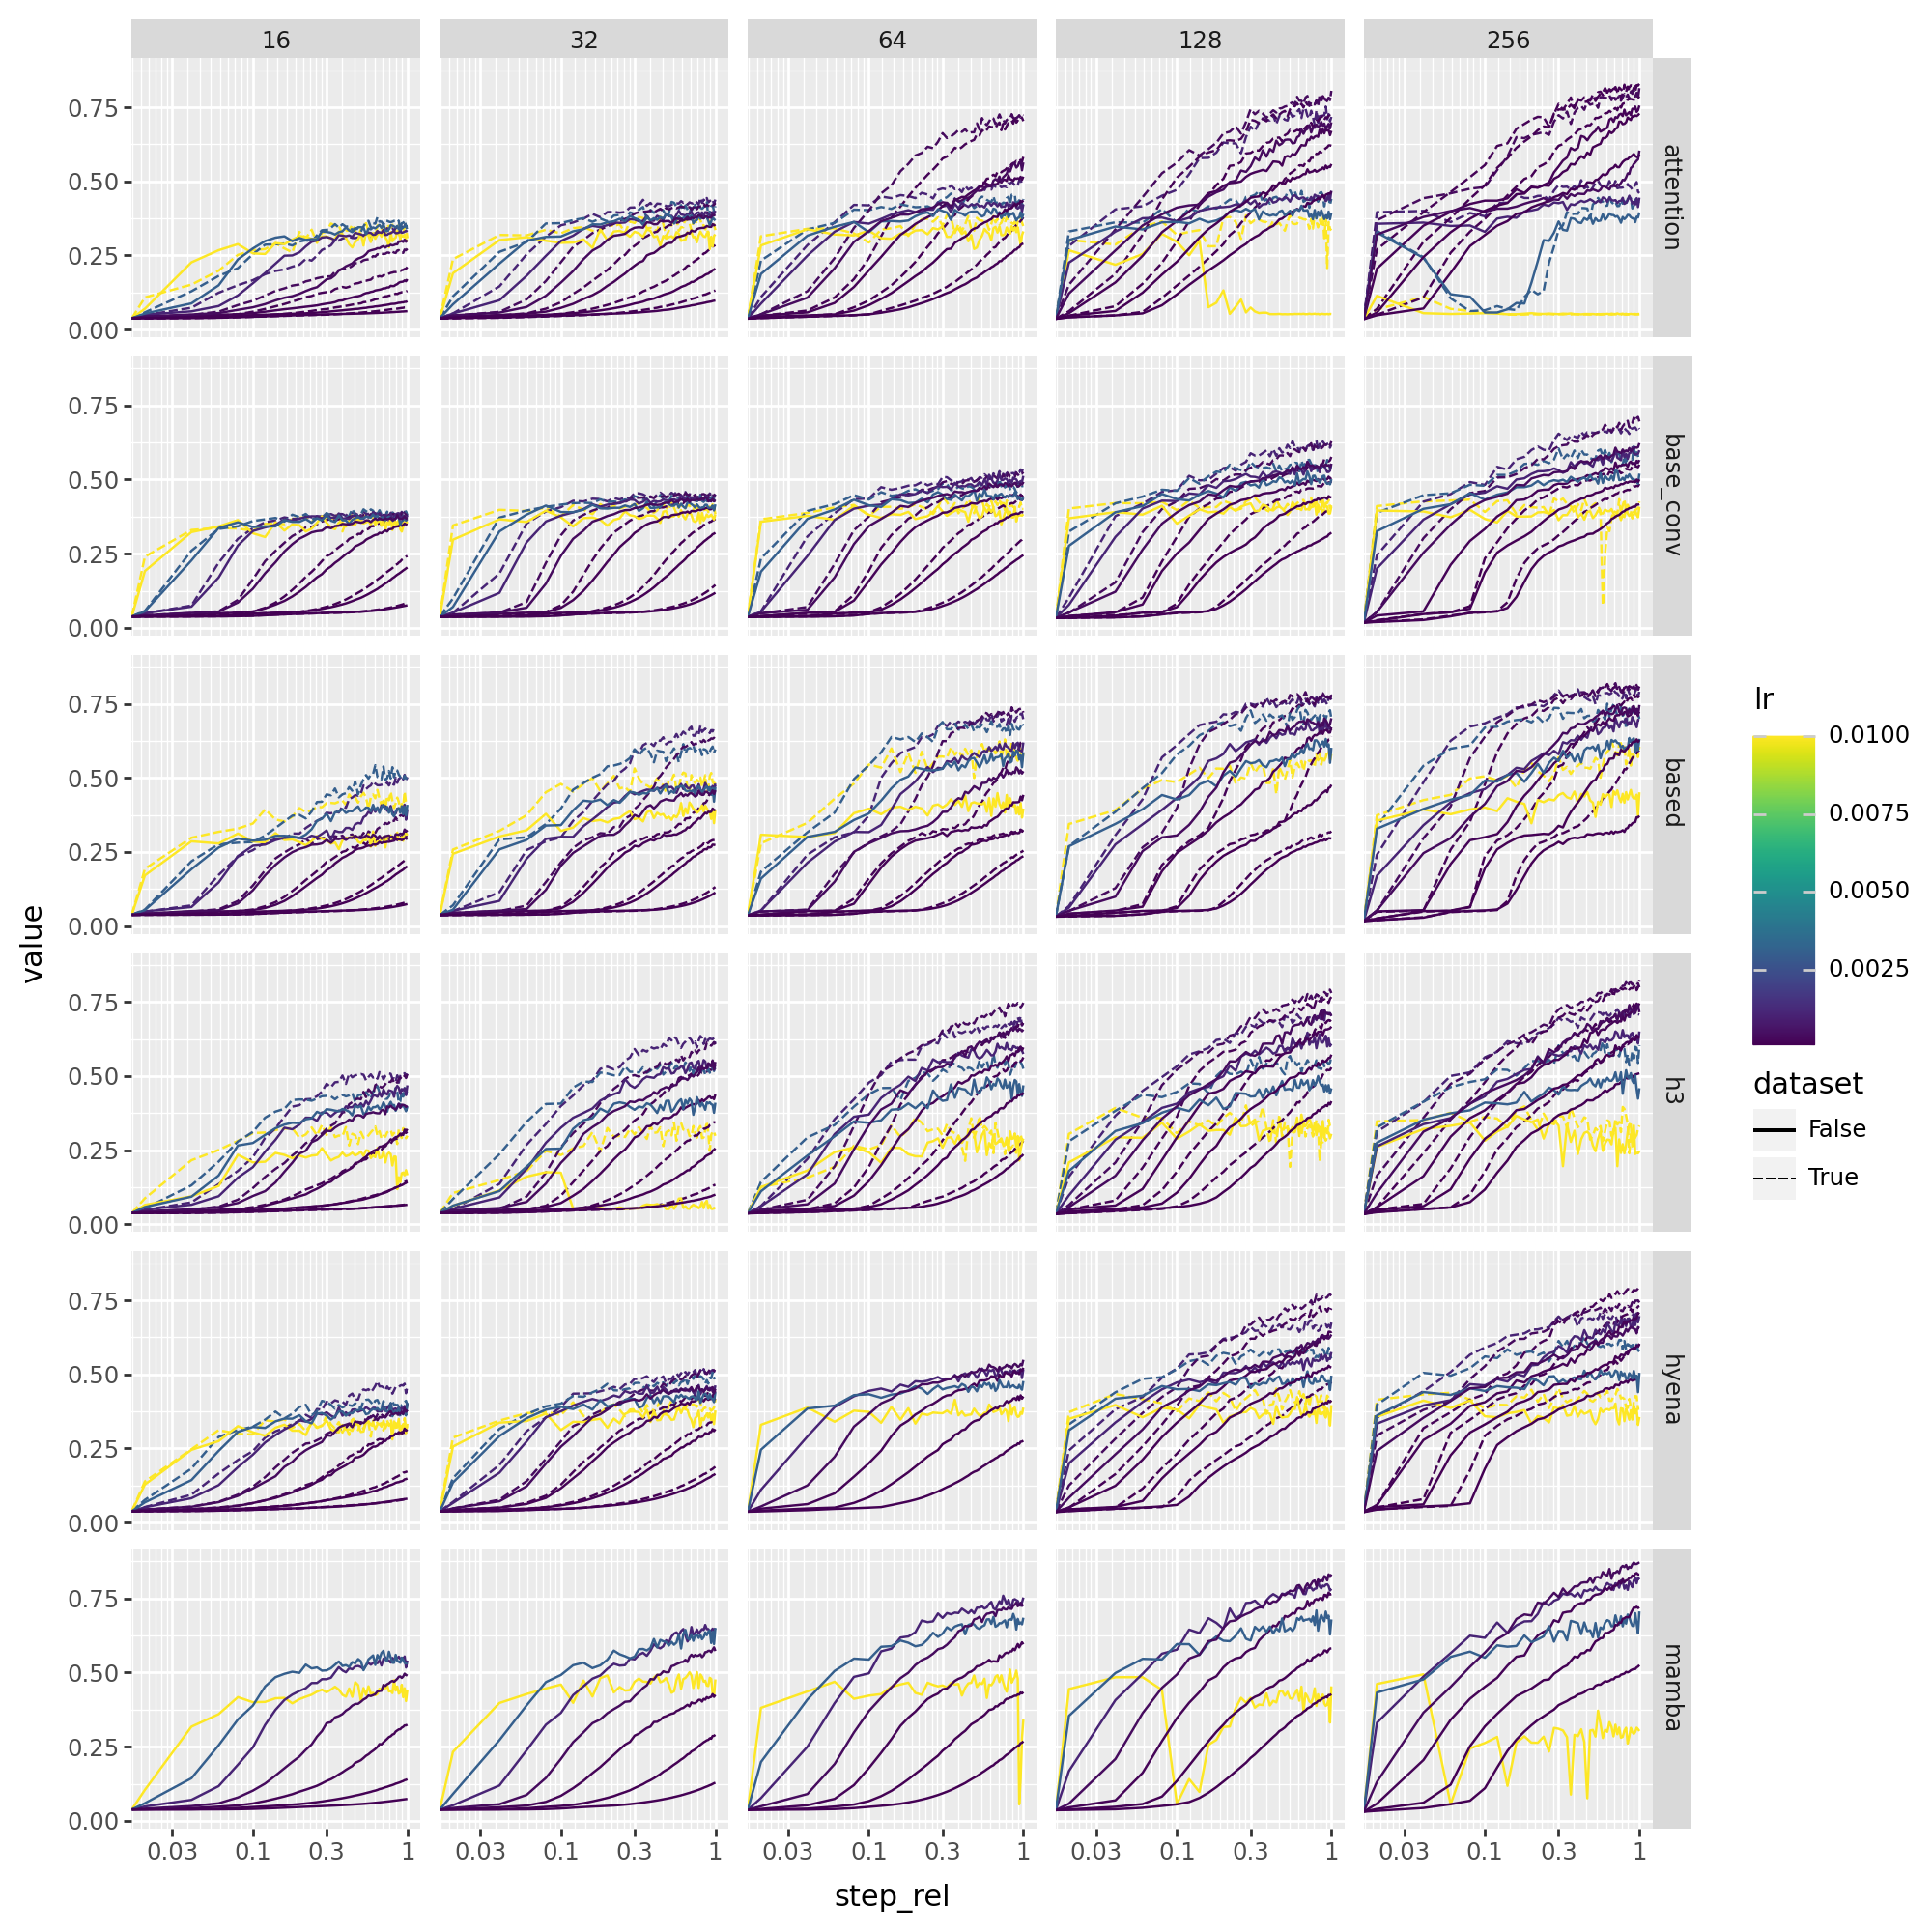

In [18]:
subset_df = df[(df["variable"] == "query_item.pred_prob") & ((df["step"] % 1000) == 0)]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="lr", linetype="dataset", group="identifier")) +
    p9.geom_line() +
    # p9.geom_point() +
    # p9.geom_point() +
    p9.facet_grid("arch~dim") +
    p9.scale_x_log10() +
    p9.theme(figure_size=(10, 10))
)
plot.show()

In [10]:
subset_df = df[(df["variable"] == "query_item.pred_prob") & (df["step_rel"] == 1.0)]
subset_df = subset_df[["dim", "arch", "value", "dataset"]].groupby(["dim", "arch", "dataset"]).max().reset_index()
subset_df

dim       arch  dataset     value
0    16  attention    False  0.339269
1    16  attention     True  0.350664
2    16  base_conv    False  0.378049
3    16  base_conv     True  0.381739
4    16      based    False  0.409119
5    16      based     True  0.505218
6    16         h3    False  0.468894
7    16         h3     True  0.508167
8    16      hyena    False  0.403873
9    16      hyena     True  0.461343
10   16      mamba    False  0.540798
11   32  attention    False  0.400778
12   32  attention     True  0.439519
13   32  base_conv    False  0.432554
14   32  base_conv     True  0.450611
15   32      based    False  0.480534
16   32      based     True  0.664303
17   32         h3    False  0.547962
18   32         h3     True  0.608849
19   32      hyena    False  0.462842
20   32      hyena     True  0.516416
21   32      mamba    False  0.650642
22   64  attention    False  0.563934
23   64  attention     True  0.721959
24   64  base_conv    False  0.512669
25   64  base_conv     True  0.542552
26   64      based    False  0.619488
27   64      based     True  0.720192
28   64         h3    False  0.657125
29   64         h3     True  0.747310
30   64      hyena    False  0.549109
31   64      mamba    False  0.753319
32  128  attention    False  0.699262
33  128  attention     True  0.805422
34  128  base_conv    False  0.553798
35  128  base_conv     True  0.629397
36  128      based    False  0.701244
37  128      based     True  0.778045
38  128         h3    False  0.703721
39  128         h3     True  0.780257
40  128      hyena    False  0.641822
41  128      hyena     True  0.765850
42  128      mamba    False  0.831799
43  256  attention    False  0.755858
44  256  attention     True  0.828480
45  256  base_conv    False  0.622931
46  256  base_conv     True  0.696090
47  256      based    False  0.745759
48  256      based     True  0.808613
49  256         h3    False  0.745672
50  256         h3     True  0.821606
51  256      hyena    False  0.703481
52  256      hyena     True  0.796393
53  256      mamba    False  0.872526

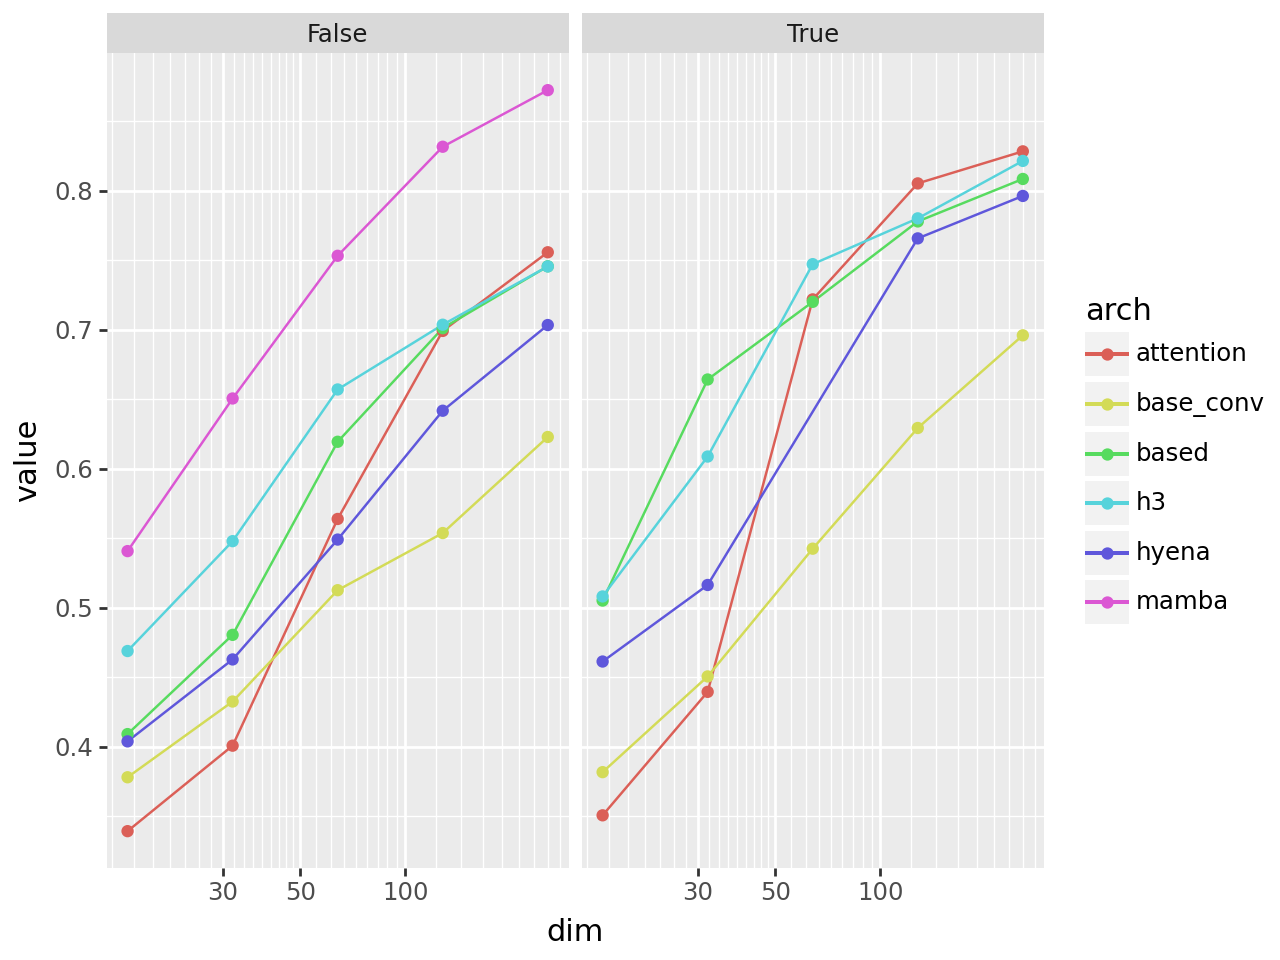

In [11]:
plot = (
    p9.ggplot(subset_df, p9.aes(x="dim", y="value", group="arch", color="arch")) +
    p9.geom_line() +
    p9.geom_point() +
    # p9.geom_point() +
    p9.facet_wrap("~dataset") +
    p9.scale_x_log10()
    # p9.scale_color_gradient(low="blue", high="red") +
    # p9.labs(y="accuracy")
)
plot.show()

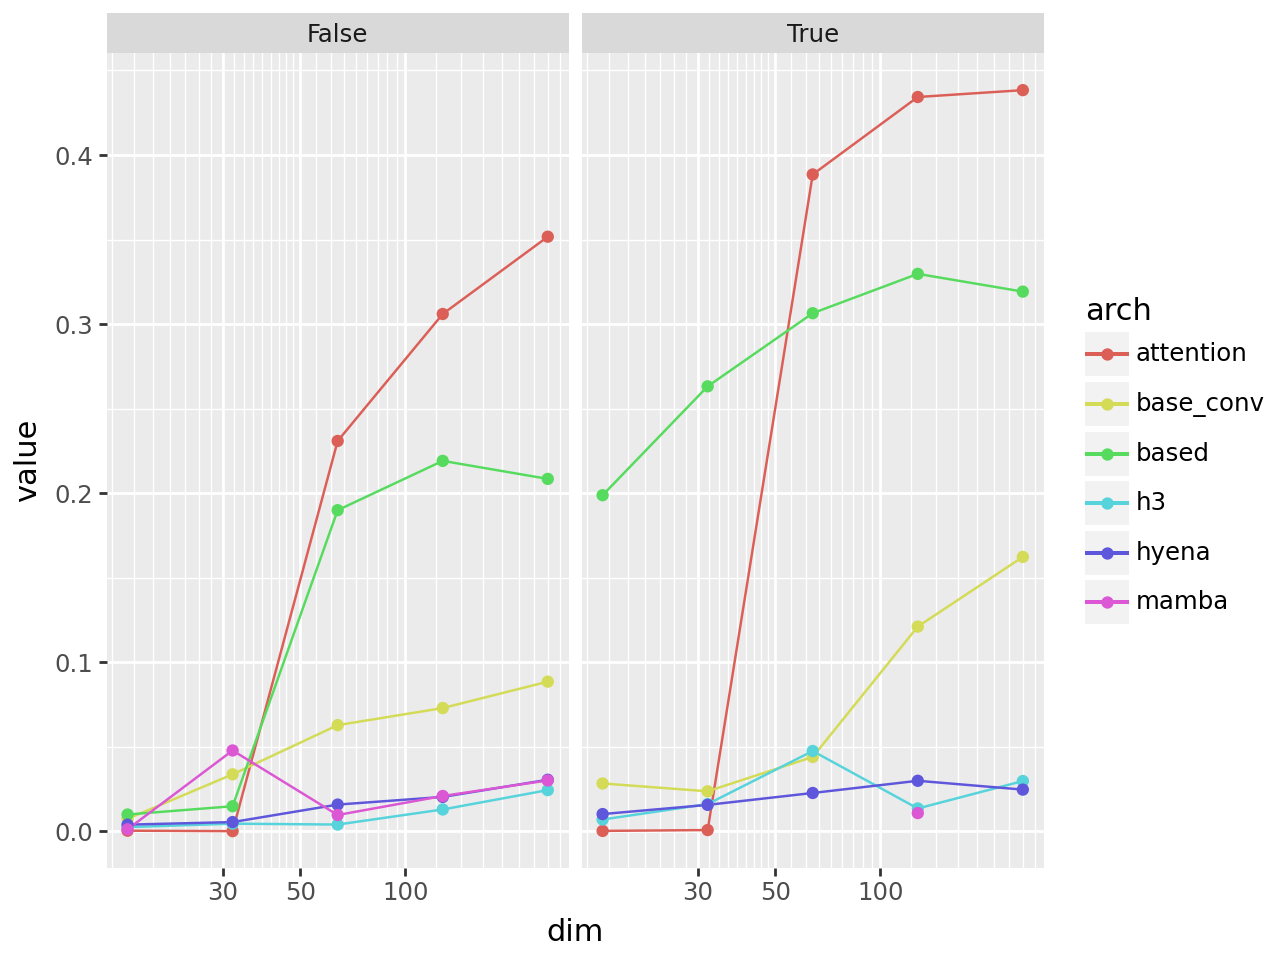

In [22]:
subset_df = df[(df["variable"] == "1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff") & (df["step_rel"] == 1.0)]
subset_df = subset_df[["dim", "arch", "value", "dataset"]].groupby(["dim", "arch", "dataset"]).max().reset_index()
plot = (
    p9.ggplot(subset_df, p9.aes(x="dim", y="value", group="arch", color="arch")) +
    p9.geom_line() +
    p9.geom_point() +
    # p9.geom_point() +
    p9.facet_wrap("~dataset") +
    p9.scale_x_log10()
    # p9.scale_color_gradient(low="blue", high="red") +
    # p9.labs(y="accuracy")
)
plot.show()

/juice2/scr2/aryaman/tinylang/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


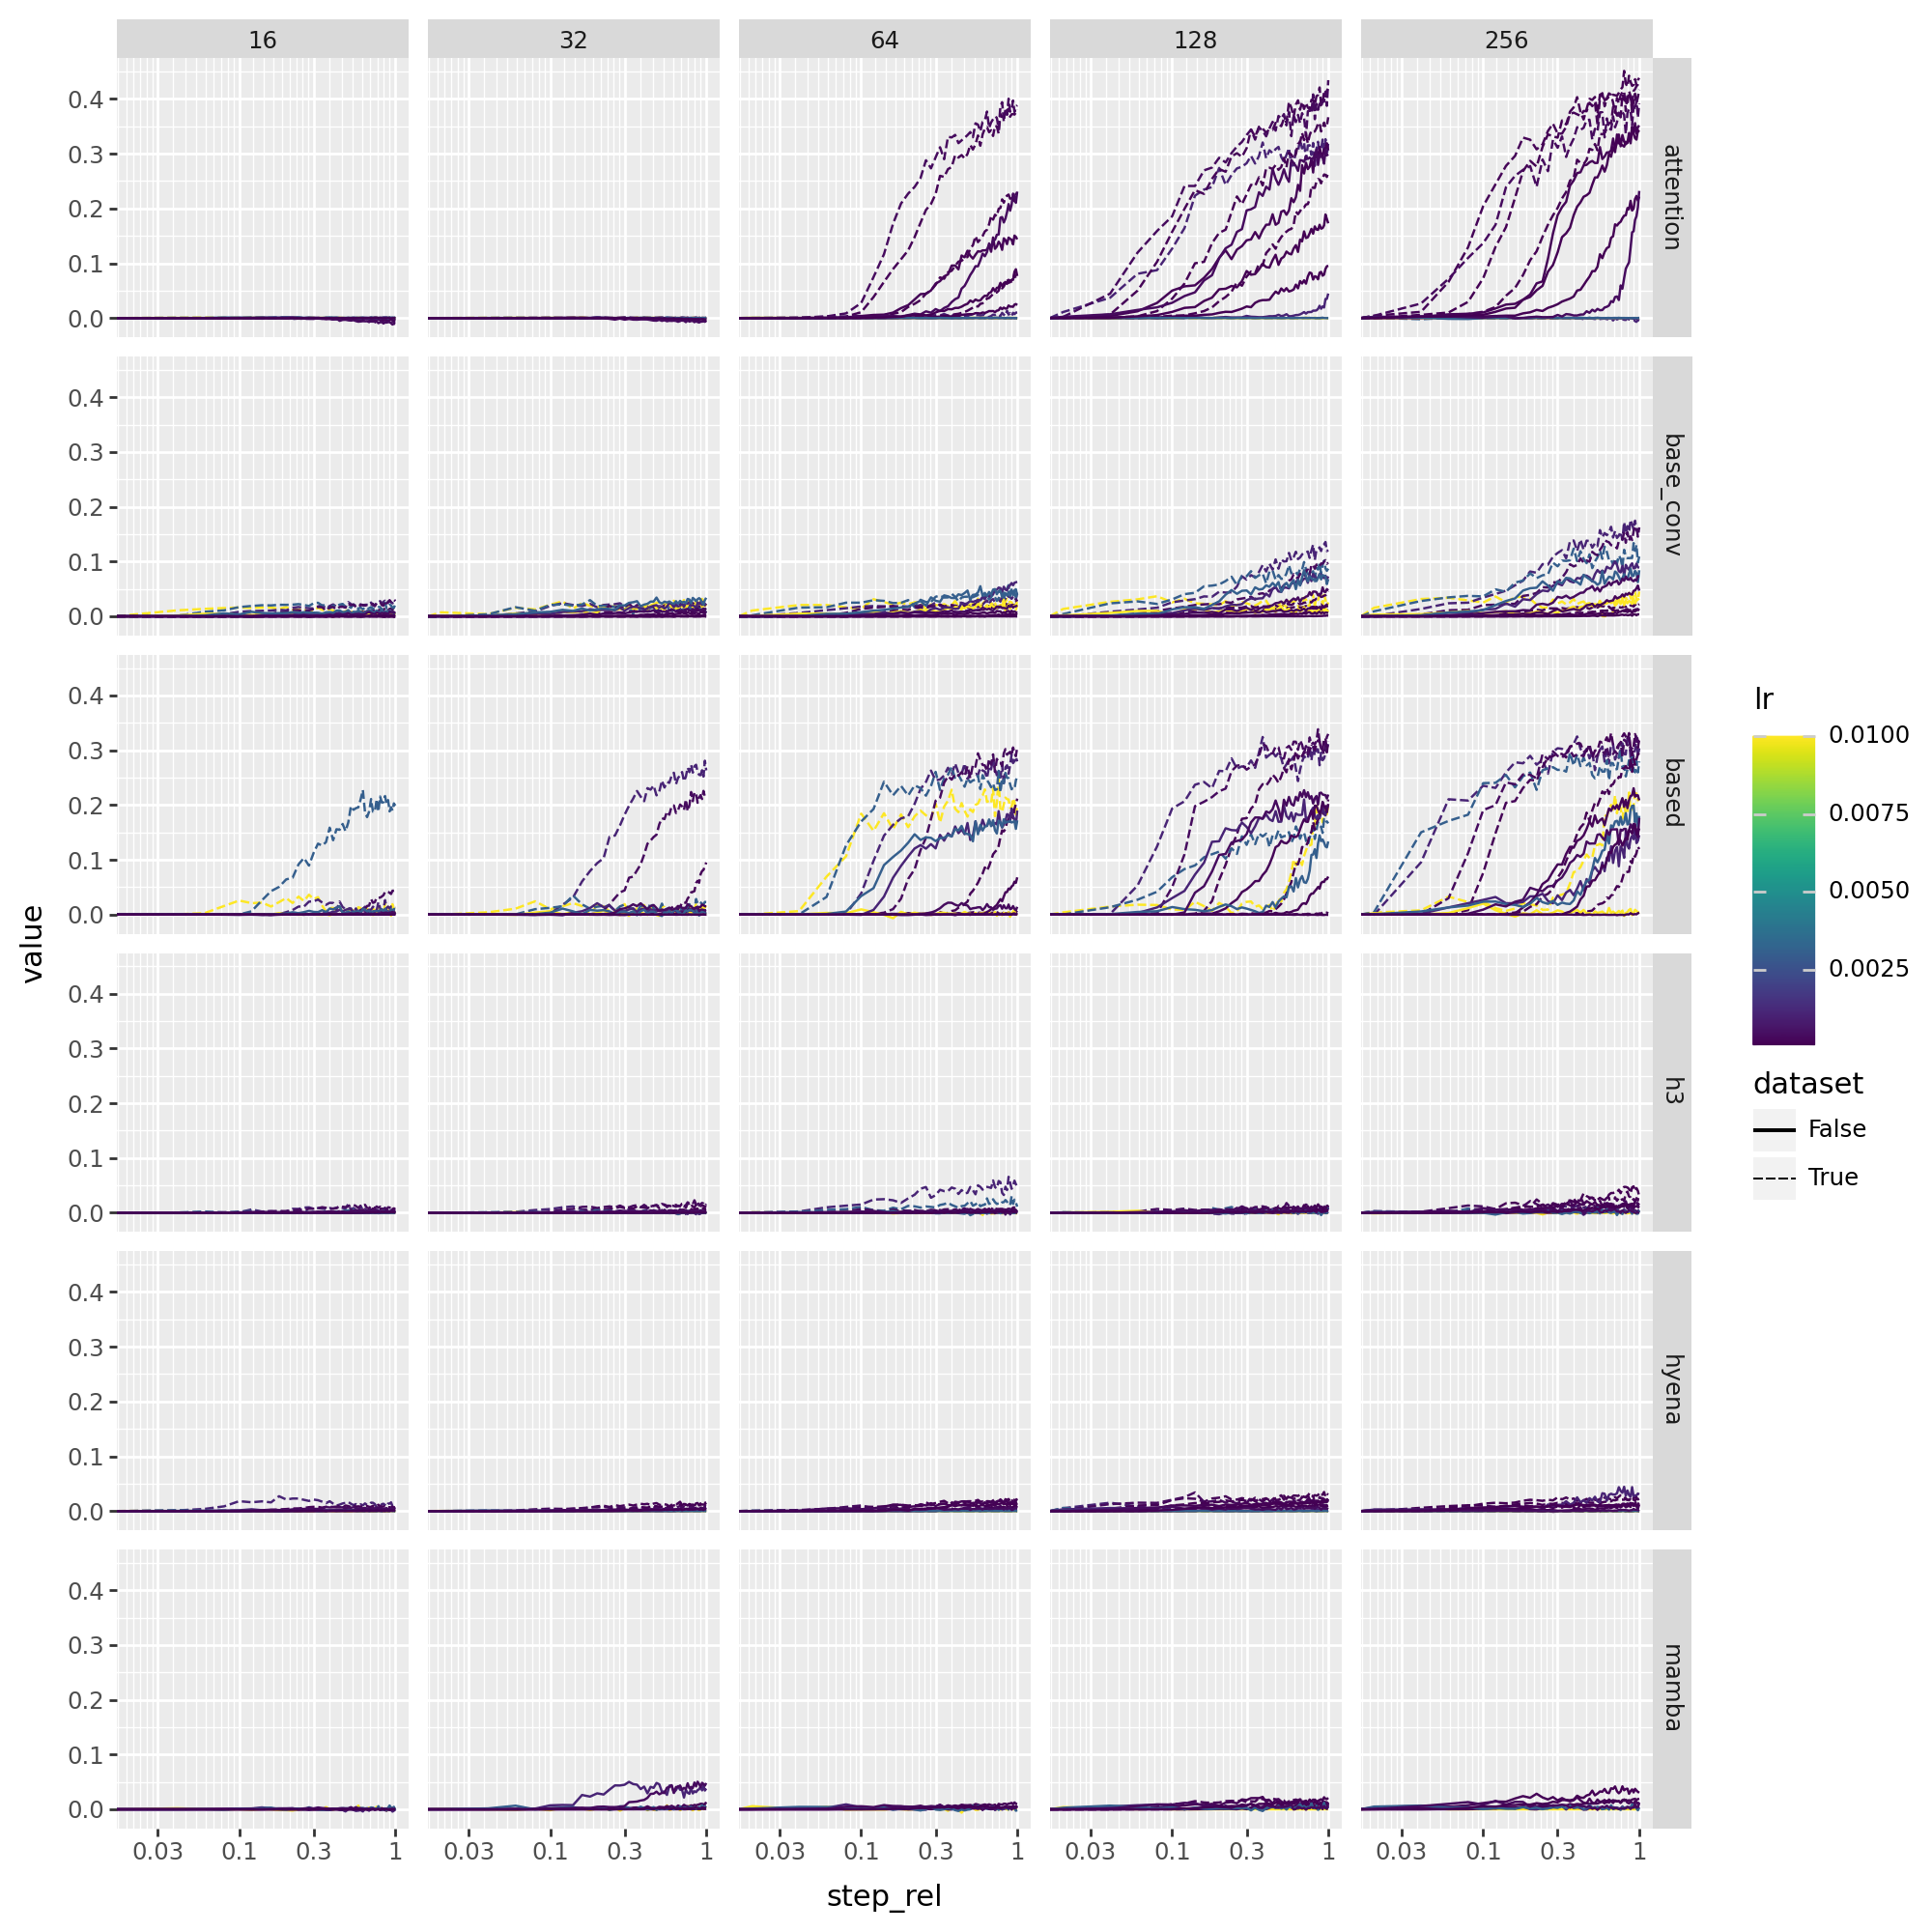

In [23]:
subset_df = df[(df["variable"] == "1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff")]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="lr", linetype="dataset", group="identifier")) +
    p9.geom_line() +
    # p9.geom_point() +
    # p9.geom_point() +
    p9.facet_grid("arch~dim") +
    p9.scale_x_log10() +
    p9.theme(figure_size=(10, 10))
)
plot.show()

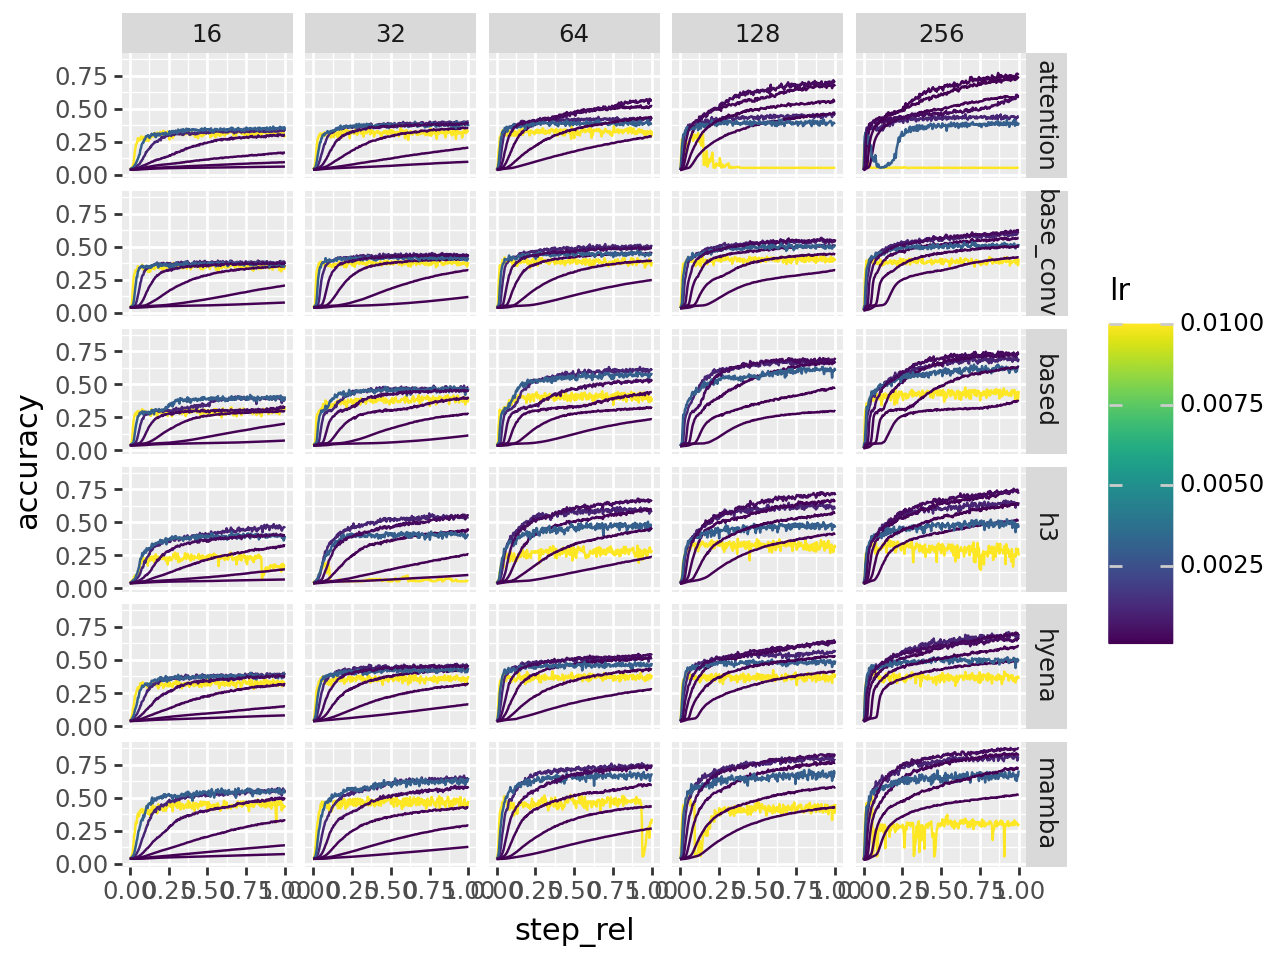

In [8]:
subset_df = df[df["variable"] == "query_item.pred_prob"]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="lr", group="identifier")) +
    p9.geom_line() +
    p9.facet_grid("arch~dim") +
    p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()

/juice2/scr2/aryaman/tinylang/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


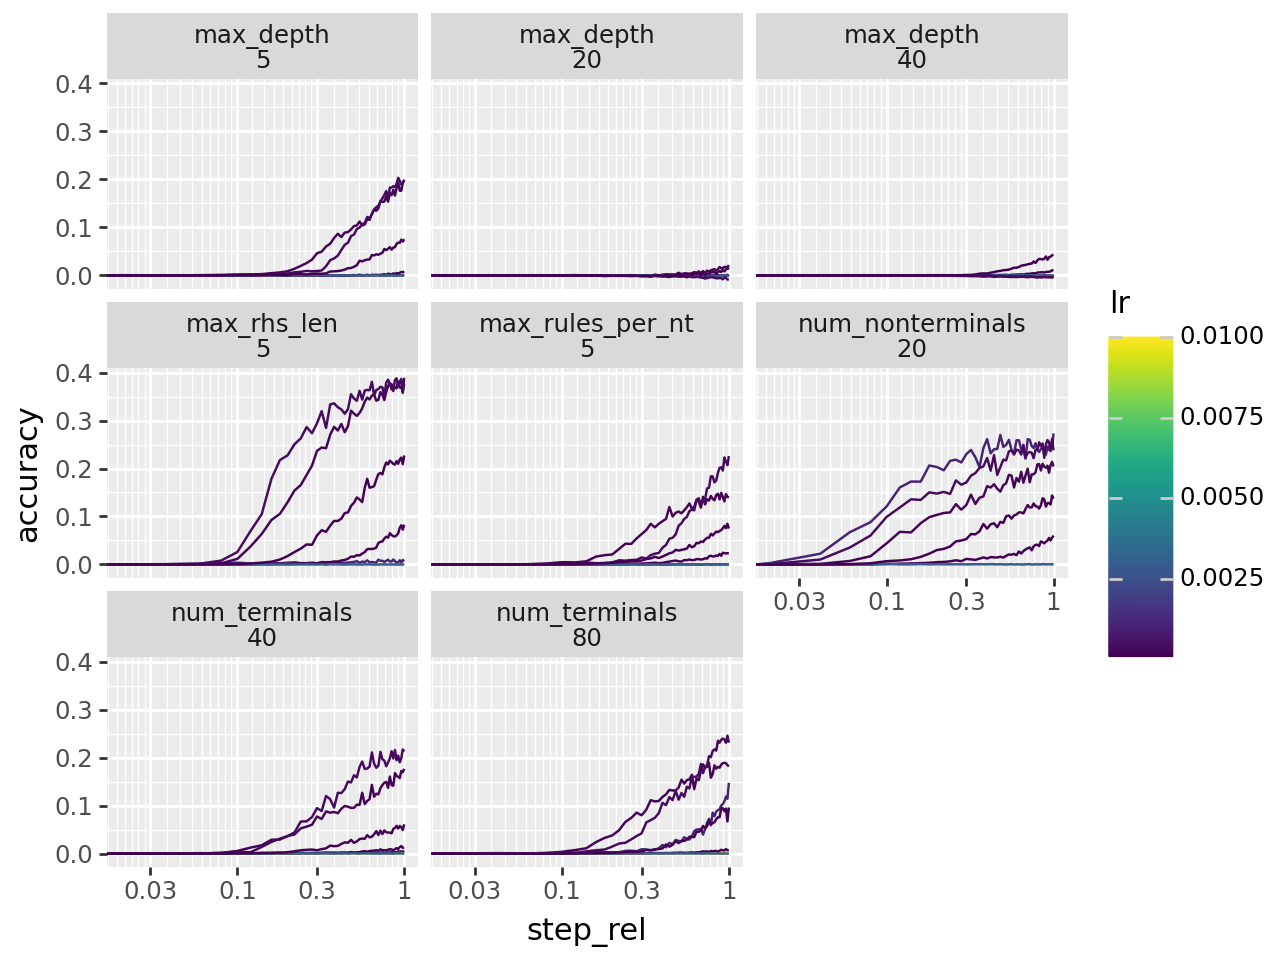

In [31]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"] == "1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff"]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="lr", group="identifier")) +
    p9.geom_line() +
    p9.facet_wrap("~ablation + ablation_val") +
    p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()

['step_rel', 'lr', 'ablation', 'ablation_val', '1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff', 'query_item.pred_prob', 'identifier']
2856


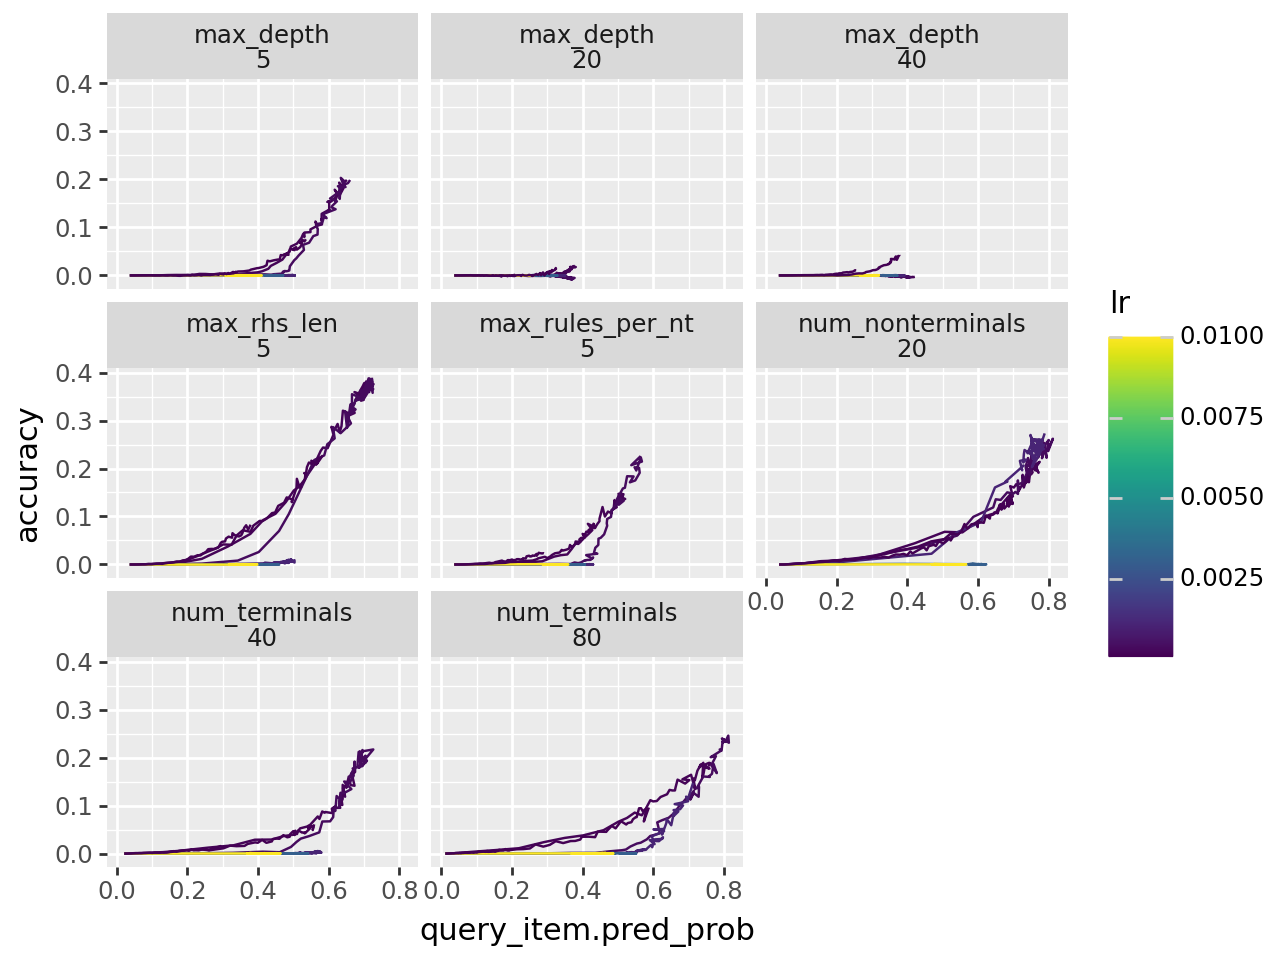

In [79]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"].isin(["1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff", "query_item.pred_prob"])]
subset_df = subset_df.pivot(index=["step_rel", "lr", "ablation", "ablation_val"], columns="variable", values="value").reset_index()
subset_df["identifier"] = subset_df["lr"].apply(lambda x: str(x))
# subset_df["lr"] = subset_df["lr"].astype(str)
subset_df = subset_df.sort_values(by=["identifier", "step_rel"]).dropna()
# print(subset_df.head())
print(list(subset_df.columns))
print(len(subset_df))
# print(subset_df)
plot = (
    p9.ggplot(subset_df, p9.aes(x="query_item.pred_prob", y="1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff", color="lr", group="identifier")) +
    p9.geom_path() +
    p9.facet_wrap("~ablation + ablation_val") +
    # p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()


['step_rel', 'lr', 'ablation', 'ablation_val', '0.PARENT.target_item_orig.target_item_orig.attention_input.logit_diff', '1.PARENT.query_item_orig.target_item_orig.attention_input.logit_diff', 'identifier']
2856


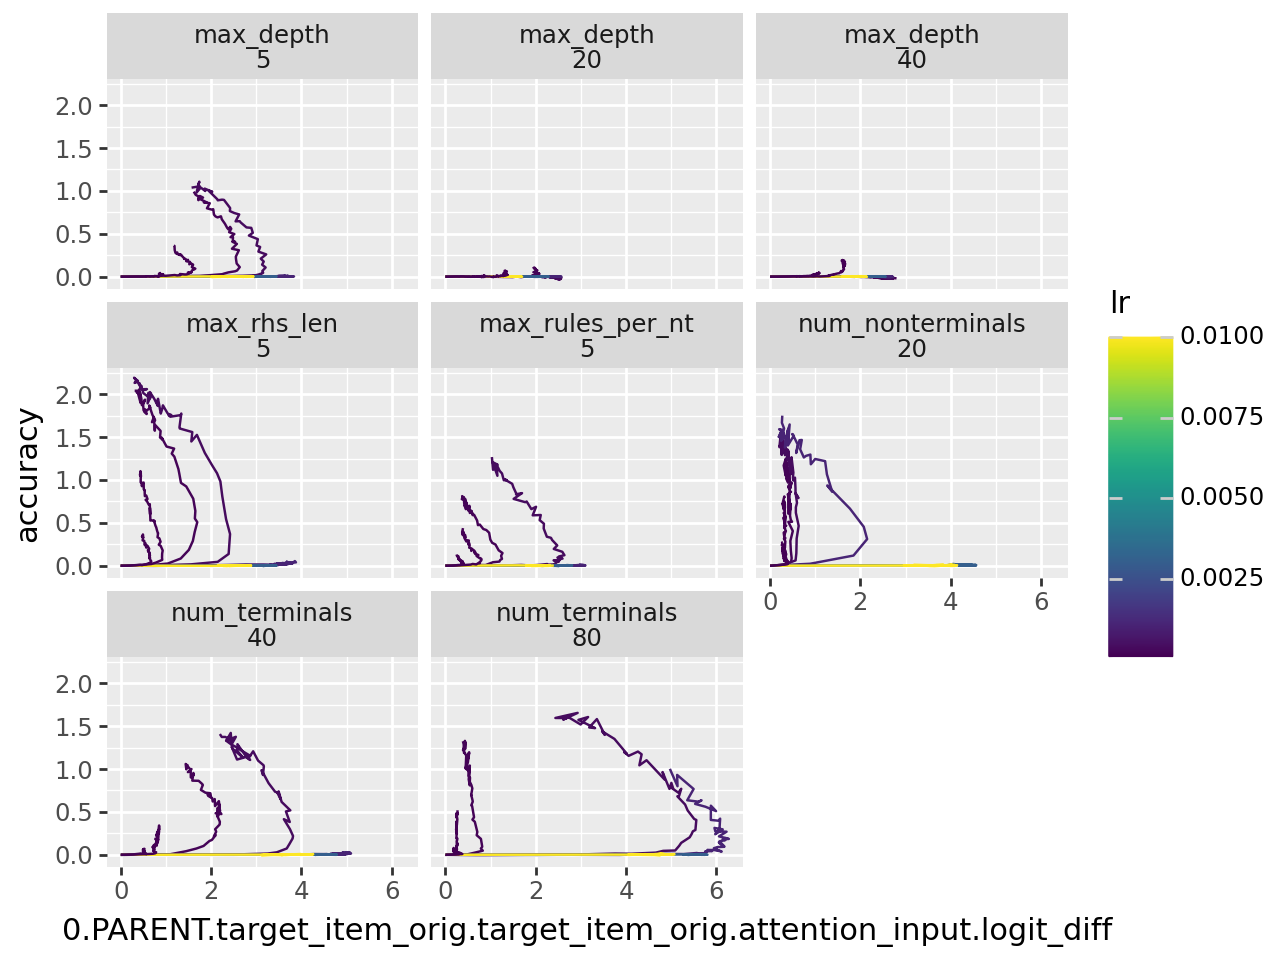

In [112]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"].isin(["1.PARENT.query_item_orig.target_item_orig.attention_input.logit_diff", "0.PARENT.target_item_orig.target_item_orig.attention_input.logit_diff"])]
subset_df = subset_df.pivot(index=["step_rel", "lr", "ablation", "ablation_val"], columns="variable", values="value").reset_index()
subset_df["identifier"] = subset_df["lr"].apply(lambda x: str(x))
# subset_df["lr"] = subset_df["lr"].astype(str)
subset_df = subset_df.sort_values(by=["identifier", "step_rel"]).dropna()
# print(subset_df.head())
print(list(subset_df.columns))
print(len(subset_df))
# print(subset_df)
plot = (
    p9.ggplot(subset_df, p9.aes(x="0.PARENT.target_item_orig.target_item_orig.attention_input.logit_diff", y="1.PARENT.query_item_orig.target_item_orig.attention_input.logit_diff", color="lr", group="identifier")) +
    p9.geom_path() +
    p9.facet_wrap("~ablation + ablation_val") +
    # p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()


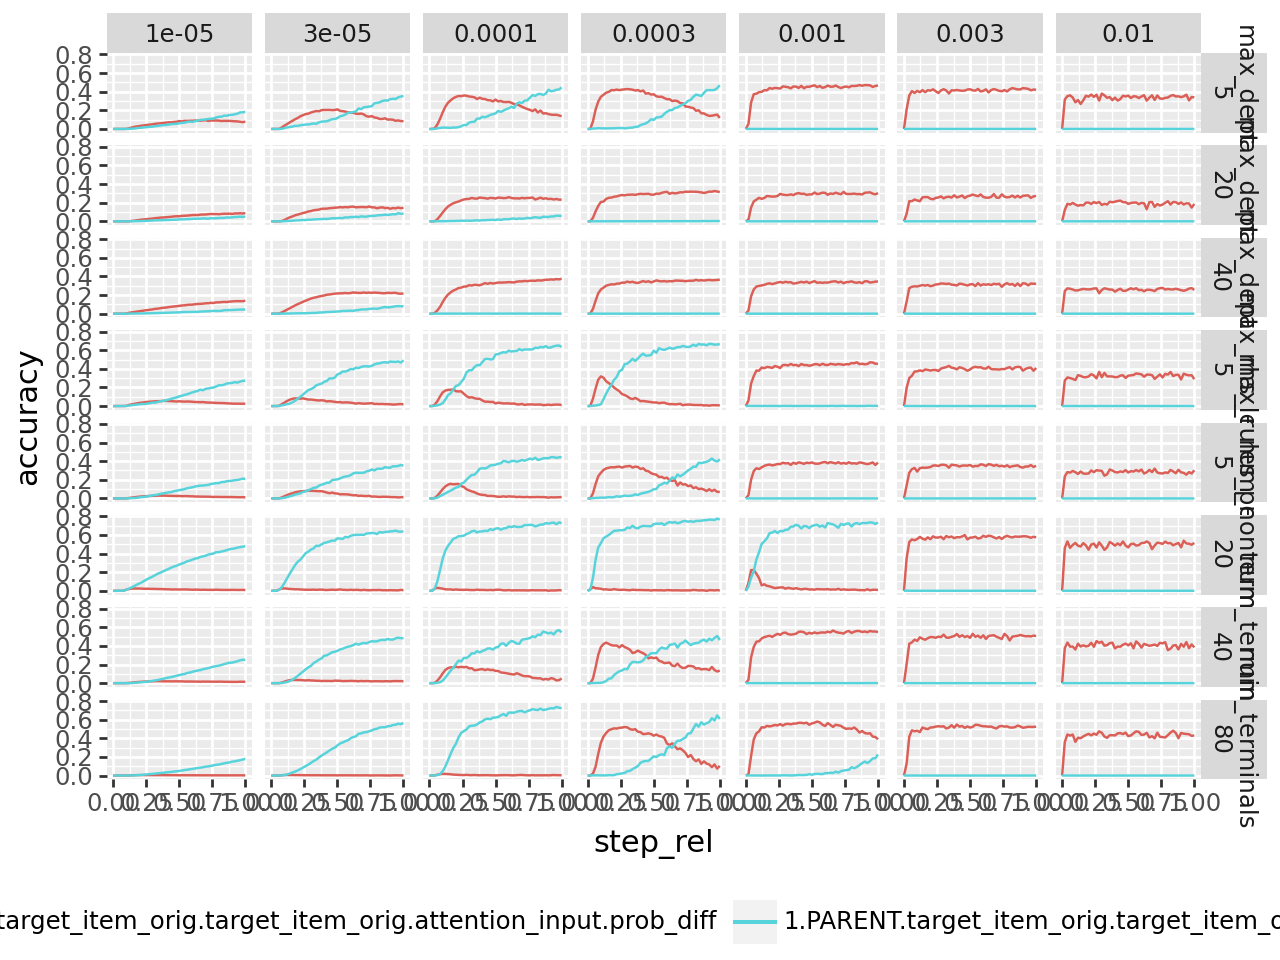

In [110]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"].isin([
    "0.PARENT.target_item_orig.target_item_orig.attention_input.prob_diff",
    "1.PARENT.target_item_orig.target_item_orig.attention_input.prob_diff"
])]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="variable", group="variable")) +
    p9.geom_line() +
    p9.facet_grid("ablation + ablation_val~lr") +
    # p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy") +
    p9.theme(legend_position="bottom")
)
plot.show()

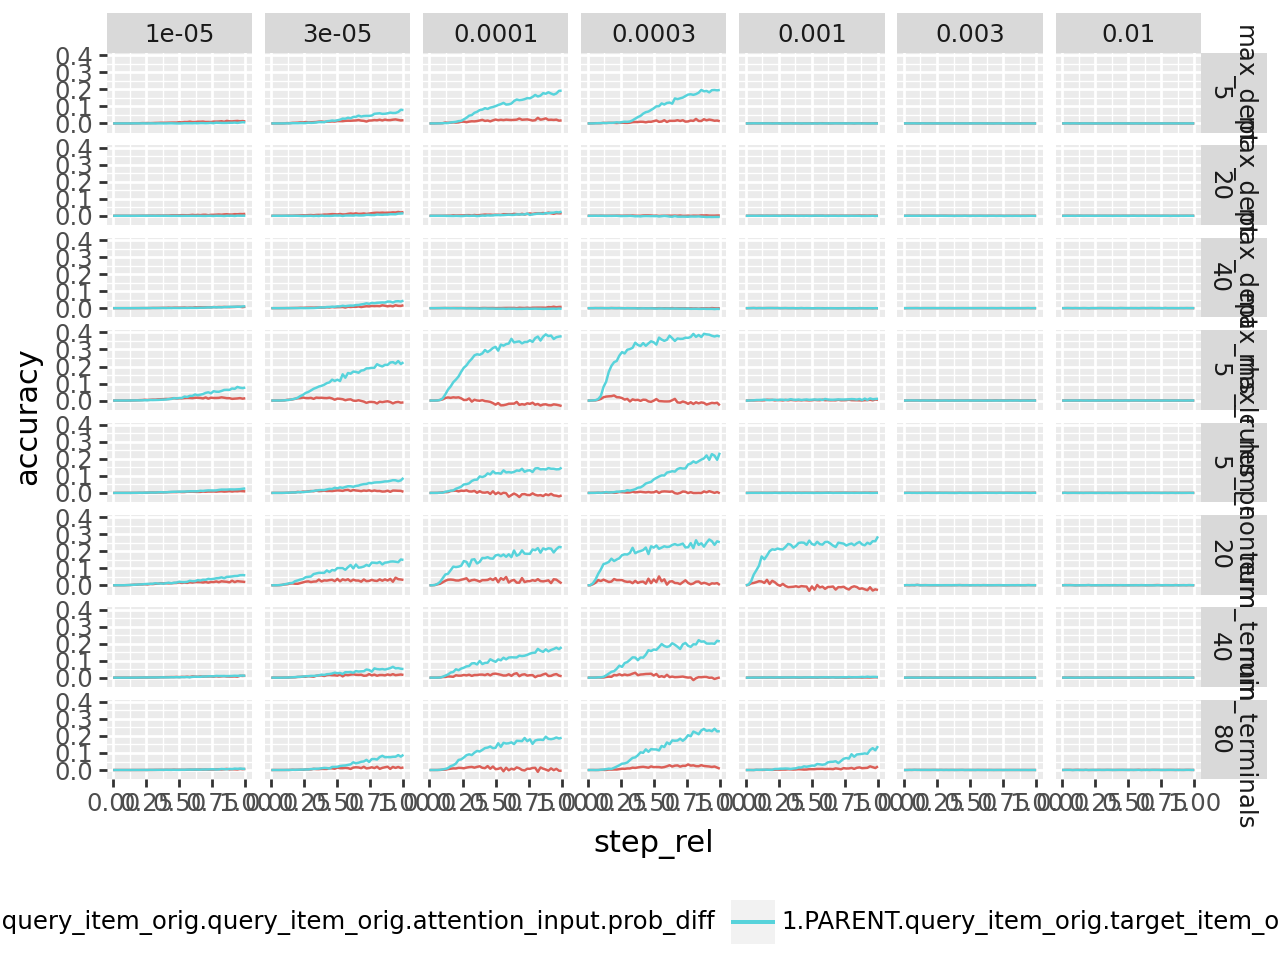

In [106]:
# eval/InterchangeEvaluator/1.PARENT.query_item_orig.target_item_orig.block_input.prob_diff and model.config.n_embd v. eval/SummaryEvaluator/query_item.pred_prob
subset_df = df[df["variable"].isin([
    "1.PARENT.query_item_orig.query_item_orig.attention_input.prob_diff",
    "1.PARENT.query_item_orig.target_item_orig.attention_input.prob_diff"
])]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="variable", group="variable")) +
    p9.geom_line() +
    p9.facet_grid("ablation + ablation_val~lr") +
    # p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy") +
    p9.theme(legend_position="bottom")
)
plot.show()